# BONUS TRACK 2

In [54]:
import pandas as pd
import numpy as np
import psycopg2
import os
from dotenv import load_dotenv
import sys #permite navegar por el sistema
sys.path.append("../") #solo aplica al soporte
import src.soporte_carga_BBDD as sc
import src.soporte_EDA as se
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

True

In [25]:
#Llamamos a la variable de entorno
DB_NAME = os.getenv("DB_NAME")
DB_USER=os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST= os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")

In [26]:
#Creamos la conexión:
conn = psycopg2.connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT
)

#Creamos el cursor:
cur= conn.cursor()

In [27]:
#Comprobamos que la conexión está bien realizada:
cur.execute("SELECT version();")
cur.fetchone() #para que muestre el resultado de la query anterior

('PostgreSQL 16.4, compiled by Visual C++ build 1940, 64-bit',)

## 1. Una vez creada la base de datos haz una o varias consultas para crear un dataframe con los datos relevantes para hacer un análisis de precios entre la competencia y nuestros hoteles para esas fechas.

In [28]:
query_extracción= "SELECT r.id_hotel, h.nombre_hotel, h.competencia, r.precio_noche FROM reservas r INNER JOIN hoteles h ON r.id_hotel =h.id_hotel "
cur.execute(query_extracción)
resultados = cur.fetchall()
df = pd.DataFrame(resultados, columns=["id_hotel", "nombre_hotel", "competencia", "precio_noche"])
cur.close() #cierro el cursor
conn.close() #cierro la conexión
df

,id_hotel,nombre_hotel,competencia,precio_noche
0,1,Novotel Madrid Center,True,268.00
1,2,ibis budget Madrid Calle 30,True,110.00
2,3,Hotel Monte Verde,False,119.96
3,4,Hotel Brisas del Mar,False,211.53
4,5,Hotel Camino del Sol,False,378.37
...,...,...,...,...
14995,11,Hotel Jardines del Rey,False,111.78
14996,10,ibis budget Madrid Centro las Ventas,True,119.00
14997,4,Hotel Brisas del Mar,False,442.96
14998,2,ibis budget Madrid Calle 30,True,110.00


In [29]:
#Analizo los datos de cada columna:
se.reporte_1(df)

,tipo_variables,contador_total,numero_nulos,porcentaje_nulos,valores_unicos,duplicados
id_hotel,int64,15000,0,0.0,29,14971
nombre_hotel,object,15000,0,0.0,29,14971
competencia,bool,15000,0,0.0,2,14998
precio_noche,float64,15000,0,0.0,8835,6165


In [30]:
print(f'Existen {len(df.nombre_hotel.value_counts())} hoteles')
print(f'Existen {len((df[df['competencia']==True]).nombre_hotel.value_counts())} hoteles de la competencia')
print(f'Existen {len((df[df['competencia']==False]).nombre_hotel.value_counts())} hoteles propios')

Existen 29 hoteles
Existen 10 hoteles de la competencia
Existen 19 hoteles propios


In [31]:
df['competencia'] = df["competencia"].replace({True: 'Competencia', False: 'Propios'})

In [32]:
round(df.groupby(['competencia', 'nombre_hotel'])['precio_noche'].agg(['min', 'max', 'mean']),2)


min     max    mean
competencia nombre_hotel                                                
Competencia Novotel Madrid Campo de las Naciones  162.00  162.00  162.00
            Novotel Madrid Center                 268.00  268.00  268.00
            Novotel Madrid City Las Ventas        182.00  182.00  182.00
            Pullman Madrid Airport & Feria        143.00  143.00  143.00
            ibis Madrid Aeropuerto Barajas        129.00  129.00  129.00
            ibis Madrid Calle Alcalá              133.00  133.00  133.00
            ibis Madrid Centro las Ventas         181.00  181.00  181.00
            ibis budget Madrid Calle 30           110.00  110.00  110.00
            ibis budget Madrid Centro las Ventas  119.00  119.00  119.00
            ibis budget Madrid Vallecas           107.00  107.00  107.00
Propios     Gran Hotel Madrid                      50.27  498.59  265.03
            Hotel Brisas del Mar                   50.43  499.73  275.22
            Hotel Camino del Sol                   51.09  499.27  269.76
            Hotel Costa Azul                       50.21  499.74  284.29
            Hotel Encanto Real                     51.83  497.65  278.24
            Hotel Jardines del Rey                 51.99  499.63  272.48
            Hotel Las Estrellas                    50.19  499.82  271.72
            Hotel Los Almendros                    50.29  499.29  273.76
            Hotel Luz de Madrid                    50.96  499.67  269.94
            Hotel Maravilla Real                   52.05  499.70  284.41
            Hotel Mirador Real                     51.34  498.85  273.20
            Hotel Monte Verde                      50.01  497.76  276.64
            Hotel Palacio Imperial                 51.67  499.80  272.26
            Hotel Puerta del Cielo                 53.29  497.83  280.20
            Hotel Rincón Sereno                    51.22  499.23  277.35
            Hotel Sol y Luna                       50.03  499.51  267.91
            Hotel Torre Dorada                     53.10  499.75  272.73
            Hotel Vista Alegre                     50.41  499.38  279.86
            Palacio del Sol                        52.18  499.41  282.51

En la tabla anterior se observa que todos los hoteles de la competencia tienen el mismo precio, ya que tanto el minimo como el maximo y la media coinciden, sin embargo, en los hoteles propios si son variables.

In [33]:
round(df.groupby(['competencia'])['precio_noche'].agg(['min', 'max', 'mean']),2)

,min,max,mean
competencia,,,
Competencia,107.00,268.00,153.50
Propios,50.01,499.82,275.06


## VISUALIZACIONES

In [34]:
df_importes_agrupación_competencia_nombrehotel_3= df.groupby(['competencia', 'nombre_hotel'])['precio_noche'].sum().reset_index()
df_hoteles = df_importes_agrupación_competencia_nombrehotel_3.groupby('competencia')['precio_noche'].agg([ "sum", "count"]).reset_index()
df_hoteles['Peso_categoria']=round(df_hoteles.iloc[:,2]/df_hoteles.iloc[:,2].sum()*100,2)
df_hoteles['Peso_total_valor_recaudado']=round(df_hoteles.iloc[:,1]/df.precio_noche.sum()*100,2)

df_importes_agrupación_competencia_nombrehotel1= df.groupby('competencia')['precio_noche'].agg(["mean", "sum", "count"]).reset_index()
df_importes_agrupación_competencia_nombrehotel1['Peso_categoria']=round(df_importes_agrupación_competencia_nombrehotel1.iloc[:,3]/df_importes_agrupación_competencia_nombrehotel1.iloc[:,3].sum()*100,2)
df_importes_agrupación_competencia_nombrehotel1['Peso_total_valor_recaudado']=round(df_importes_agrupación_competencia_nombrehotel1.iloc[:,2]/df.precio_noche.sum()*100,2)

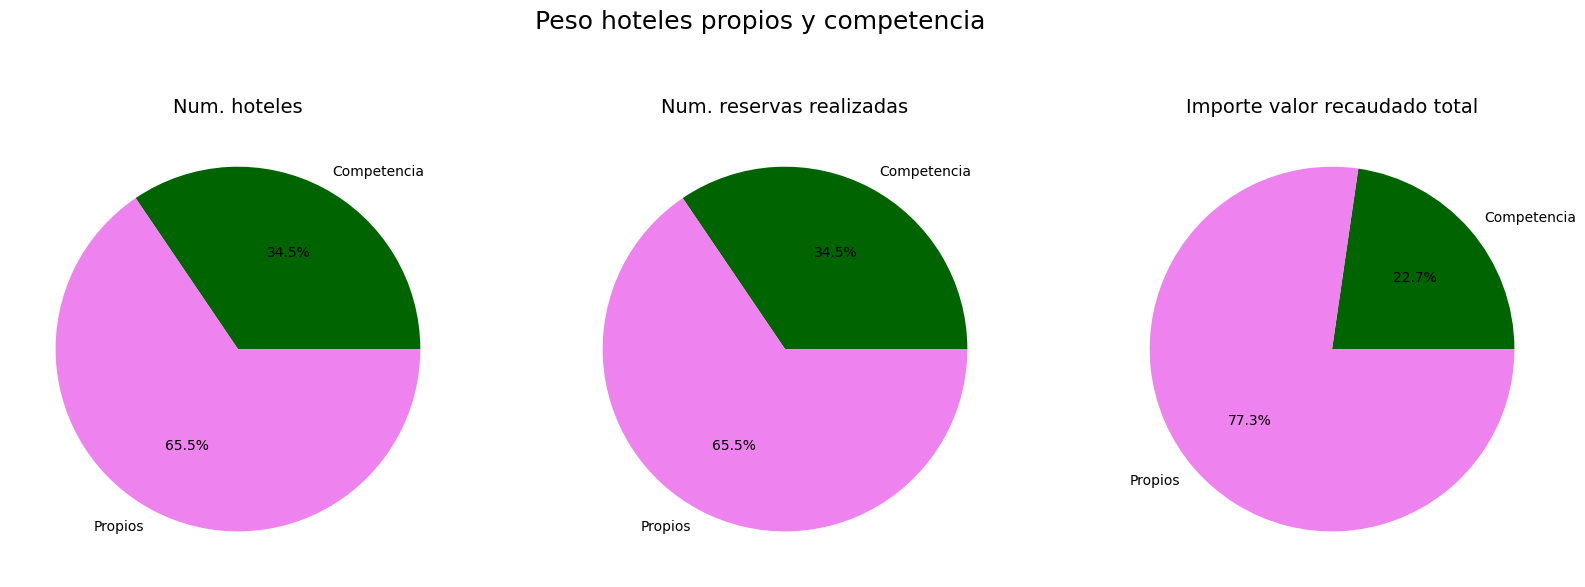

In [35]:
fig, axes = plt.subplots(1, 3, sharex= True, sharey=False, figsize= (20,7))
fig.suptitle('Peso hoteles propios y competencia', fontsize=18)

axes[0].pie("Peso_categoria", labels='competencia', autopct='%1.1f%%', data=df_hoteles, colors=['darkgreen','violet'])
plt.xticks(rotation=90, fontsize=10)
axes[0].set_title('Num. hoteles', fontsize = 14)

axes[1].pie("Peso_categoria", labels='competencia', autopct='%1.1f%%', data=df_importes_agrupación_competencia_nombrehotel1, colors=['darkgreen','violet'])
plt.xticks(rotation=90, fontsize=10)
axes[1].set_title('Num. reservas realizadas', fontsize = 14)

axes[2].pie("Peso_total_valor_recaudado", labels='competencia', autopct='%1.1f%%', data=df_hoteles,colors=['darkgreen','violet'])
plt.xticks(rotation=90, fontsize=10)
axes[2].set_title('Importe valor recaudado total', fontsize = 14);

In [36]:
df_importes_agrupación_competencia_nombrehotel= df.groupby(['competencia', 'nombre_hotel'])['precio_noche'].agg(["mean", "sum", "count"]).reset_index()
df_importes_agrupación_competencia_nombrehotel['Peso_categoria']=round(df_importes_agrupación_competencia_nombrehotel.iloc[:,4]/df_importes_agrupación_competencia_nombrehotel.iloc[:,4].sum()*100,2)
df_importes_agrupación_competencia_nombrehotel['Peso_total_valor_recaudado']=round(df_importes_agrupación_competencia_nombrehotel.iloc[:,3]/df.precio_noche.sum()*100,2)
df_importes_agrupación_competencia_nombrehotel

,competencia,nombre_hotel,mean,sum,count,Peso_categoria,Peso_total_valor_recaudado
0,Competencia,Novotel Madrid Campo de las Naciones,162.000000,83916.00,518,3.45,2.40
1,Competencia,Novotel Madrid Center,268.000000,138020.00,515,3.43,3.95
2,Competencia,Novotel Madrid City Las Ventas,182.000000,97006.00,533,3.55,2.77
3,Competencia,Pullman Madrid Airport & Feria,143.000000,74646.00,522,3.48,2.13
4,Competencia,ibis Madrid Aeropuerto Barajas,129.000000,63081.00,489,3.26,1.80
5,Competencia,ibis Madrid Calle Alcalá,133.000000,65569.00,493,3.29,1.87
6,Competencia,ibis Madrid Centro las Ventas,181.000000,94844.00,524,3.49,2.71
7,Competencia,ibis budget Madrid Calle 30,110.000000,56210.00,511,3.41,1.61
8,Competencia,ibis budget Madrid Centro las Ventas,119.000000,63903.00,537,3.58,1.83
9,Competencia,ibis budget Madrid Vallecas,107.000000,56710.00,530,3.53,1.62


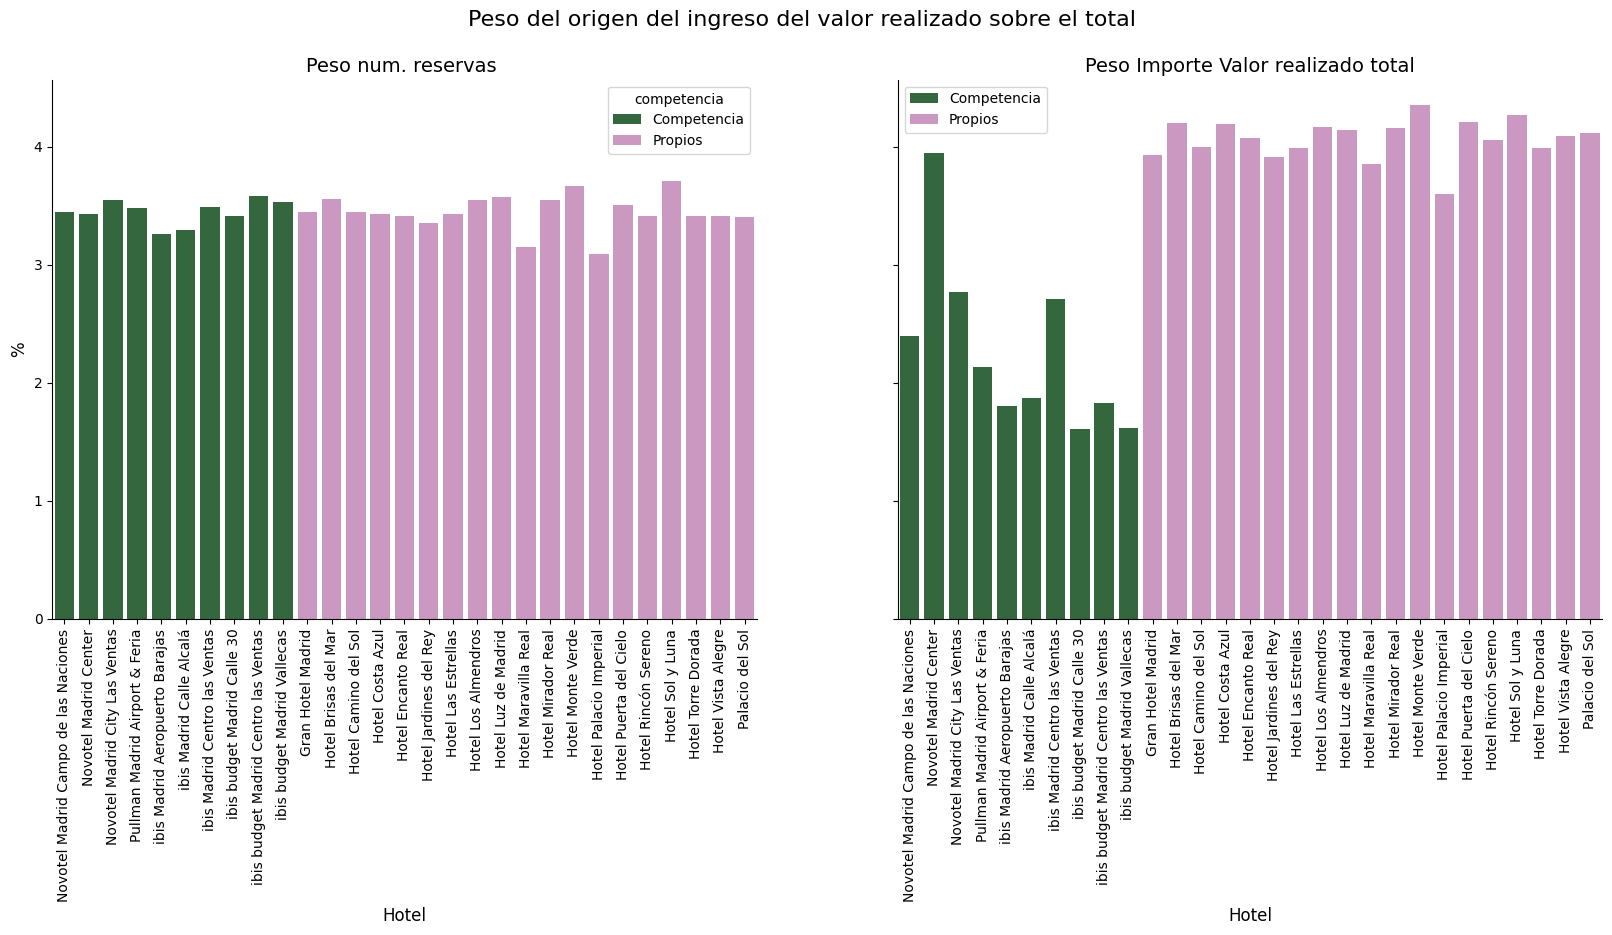

In [37]:
orden_hoteles = df_importes_agrupación_competencia_nombrehotel.nombre_hotel.values.tolist()
fig, axes = plt.subplots(1, 2, sharex= False, sharey=True, figsize= (20,7))
fig.suptitle('Peso del origen del ingreso del valor realizado sobre el total', fontsize=16)


sns.barplot(data=df_importes_agrupación_competencia_nombrehotel, x='nombre_hotel', y= 'Peso_categoria', hue='competencia',palette='cubehelix',ax=axes[0], order= orden_hoteles)
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].set_ylabel('%', fontsize = 12)
axes[0].set_xlabel('Hotel', fontsize = 12)
axes[0].set_title('Peso num. reservas ', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)


sns.barplot(data=df_importes_agrupación_competencia_nombrehotel, x='nombre_hotel', y= 'Peso_total_valor_recaudado', palette='cubehelix',ax=axes[1],  hue='competencia', order= orden_hoteles)
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].set_ylabel('%', fontsize = 12)
axes[1].set_xlabel('Hotel', fontsize = 12)
axes[1].set_title('Peso Importe Valor realizado total', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend();

In [38]:
df_importes_agrupación_competencia_nombrehotel_4= df.groupby(['competencia', 'nombre_hotel'])['precio_noche'].count().reset_index()

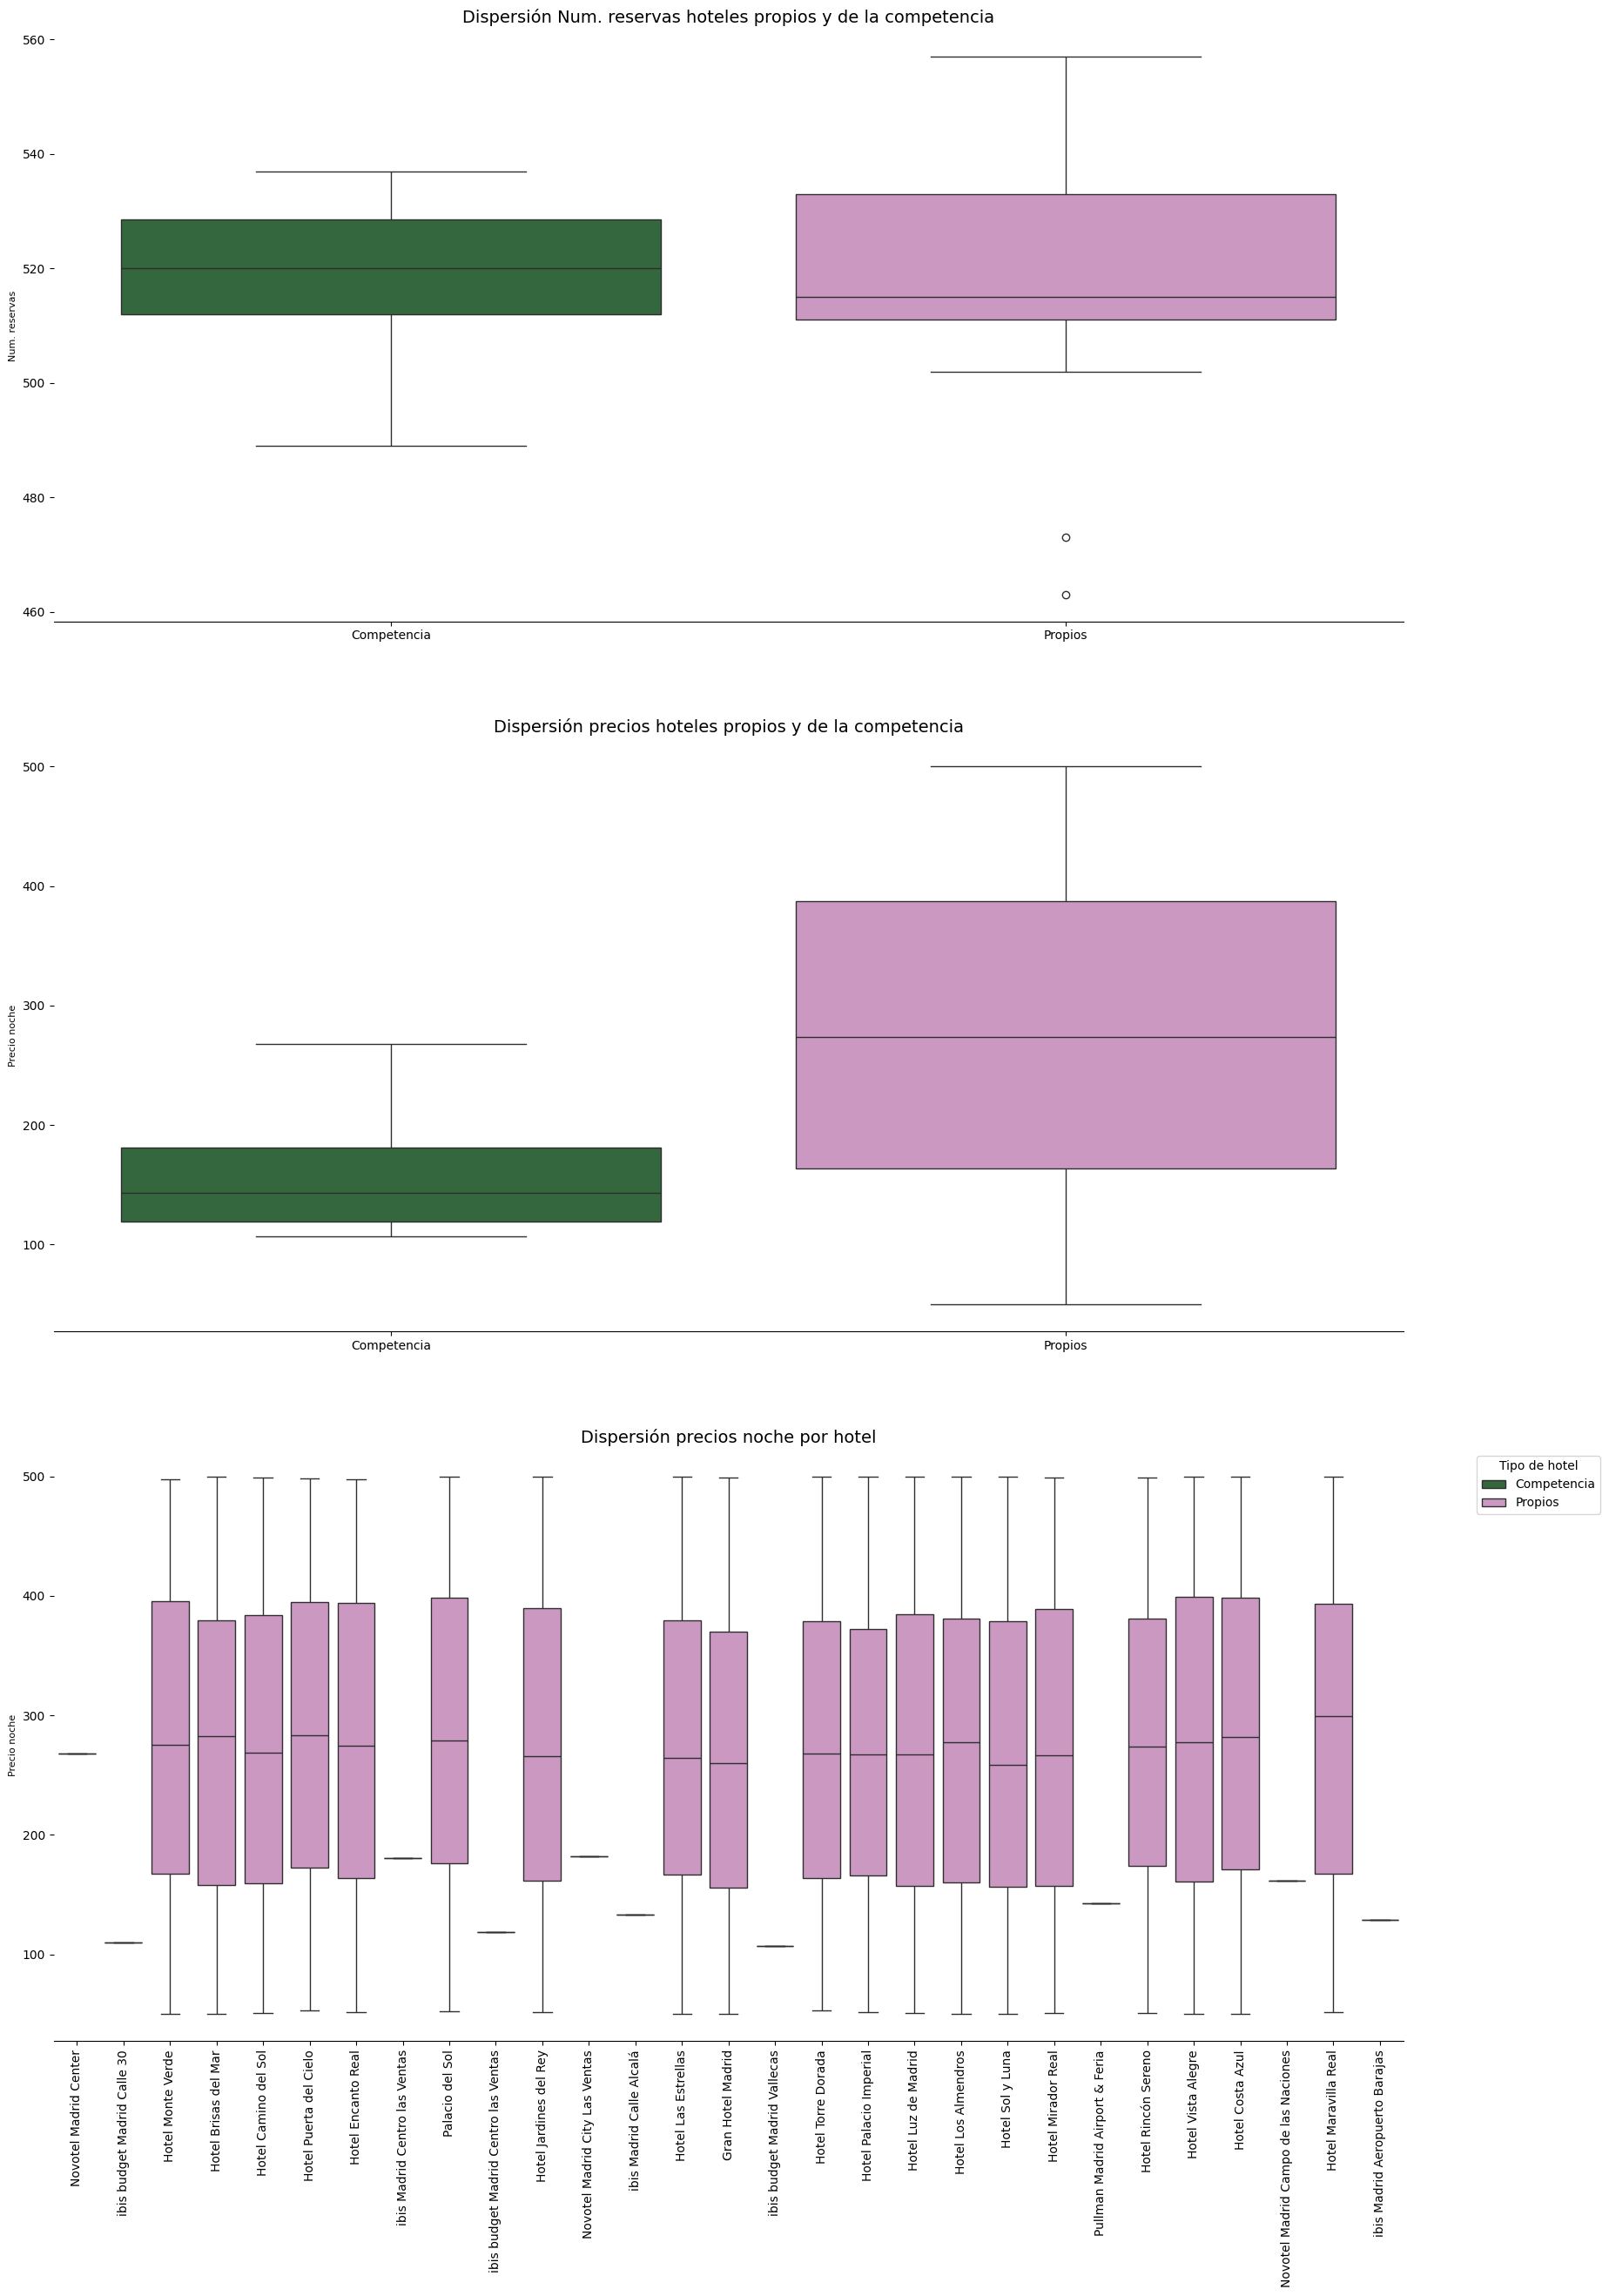

In [39]:
fig, axes = plt.subplots(3, 1, sharex= False, sharey=False, figsize= (20,30))

sns.boxplot(data=df_importes_agrupación_competencia_nombrehotel_4, x='competencia', y='precio_noche', hue='competencia', palette='cubehelix',ax=axes[0])
axes[0].set_title('Dispersión Num. reservas hoteles propios y de la competencia', fontsize = 14)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_xlabel('', fontsize = 0)
axes[0].set_ylabel("Num. reservas", fontsize=8);

sns.boxplot(data=df, x='competencia', y='precio_noche', hue='competencia', palette='cubehelix',ax=axes[1])
axes[1].set_title('Dispersión precios hoteles propios y de la competencia', fontsize = 14)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_xlabel('', fontsize = 0)
axes[1].set_ylabel("Precio noche", fontsize=8);

sns.boxplot(data=df, x='nombre_hotel', y='precio_noche', hue='competencia', palette='cubehelix',ax=axes[2])
axes[2].set_title('Dispersión precios noche por hotel', fontsize = 14)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['left'].set_visible(False)
axes[2].set_xlabel('', fontsize = 0)
axes[2].tick_params(axis='x', rotation=90, labelsize=10)
axes[2].set_ylabel("Precio noche", fontsize=8)
axes[2].legend(title = 'Tipo de hotel', title_fontsize =10,bbox_to_anchor=(1.05,1), loc = "upper left");


In [40]:

df_recuento = round(df_importes_agrupación_competencia_nombrehotel_4.groupby('competencia')['precio_noche'].agg([ "sum", "count","mean"]).reset_index(),2)
print(f' La media del num. de reservas de los hoteles de la Competencia  {int(df_recuento.iloc[0,3])} y de los hoteles propios es {int(df_recuento.iloc[1,3])} por tanto, el precio del hotel no influye en las reservas')

 La media del num. de reservas de los hoteles de la Competencia  517 y de los hoteles propios es 517 por tanto, el precio del hotel no influye en las reservas


## CONCLUSIONES
- Existen más hoteles propios que de la competencia, en concreto, el 65,5% de los hoteles son propios frente al 34,5% de la competencia.
- Esta misma proporción se mantiene en el número de reservas realizadas
- No obstante, en relación al importe del valor recaudad total, la proporción varía. Los hoteles propios reacaudan más que los hoteles de la competencia. Los propios recaudan un 77,3% frente a un 22,7% de la competencia. 
- Esta variación en la proporción se debe a que los precios de los hoteles propios son superiores. La media del precio de las reservas de los hoteles propios está en 275€ mientras que la media de las de los hoteles de la competencias es 153€. 
- Por tanto, podemos concluir que el precio de la noche de los hoteles no influye en el número de reservas realizadas. De hecho, la media del numero de reservas tanto en los hoteles propios como en los hoteles de la competencia es prácticamente la misma, 517 reservas por hotel.
- Por último, indicar que, cada hotel de la competencia tiene un precio único de reserva, sin embargo, en los hoteles propios, los precios varían. No obstante, en ninguno de ellos existen valores atípicos.

## 2. Realiza un análisis temporal de las fechas de reserva

In [41]:
#Creamos la conexión:
conn = psycopg2.connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT
)

#Creamos el cursor:
cur= conn.cursor()

In [42]:
#Comprobamos que la conexión está bien realizada:
cur.execute("SELECT version();")
cur.fetchone() #para que muestre el resultado de la query anterior

('PostgreSQL 16.4, compiled by Visual C++ build 1940, 64-bit',)

In [43]:
query_extracción= "SELECT h.nombre_hotel, h.competencia, r.fecha_reserva, count(h.nombre_hotel) , sum(r.precio_noche) , avg(r.precio_noche) FROM reservas r INNER JOIN hoteles h ON r.id_hotel =h.id_hotel GROUP BY h.id_hotel,r.fecha_reserva"
cur.execute(query_extracción)
resultados = cur.fetchall()
df_fecha_reserva = pd.DataFrame(resultados, columns=["nombre_hotel", "Tipo_hotel","fecha_reserva", "Num_reservas","Total_recaudado","Precio_medio_noche" ])
cur.close() #cierro el cursor
conn.close() #cierro la conexión

In [52]:
df_fecha_reserva['Tipo_hotel'] = df_fecha_reserva["Tipo_hotel"].replace({True: 'Competencia', False: 'Propios'})
df_fecha_reserva['Total_recaudado'] = round(df_fecha_reserva['Total_recaudado'],2)
df_fecha_reserva['Precio_medio_noche'] = round(df_fecha_reserva['Precio_medio_noche'],2)
df_fecha_reserva['fecha_reserva'] = pd.to_datetime(df_fecha_reserva['fecha_reserva'])
df_fecha_reserva['Dia_reserva'] = df_fecha_reserva['fecha_reserva'].dt.day
df_fecha_reserva['Mes_reserva'] = df_fecha_reserva['fecha_reserva'].dt.month


In [53]:
df_fecha_reserva['Mes_reserva'].unique()

array([2], dtype=int32)

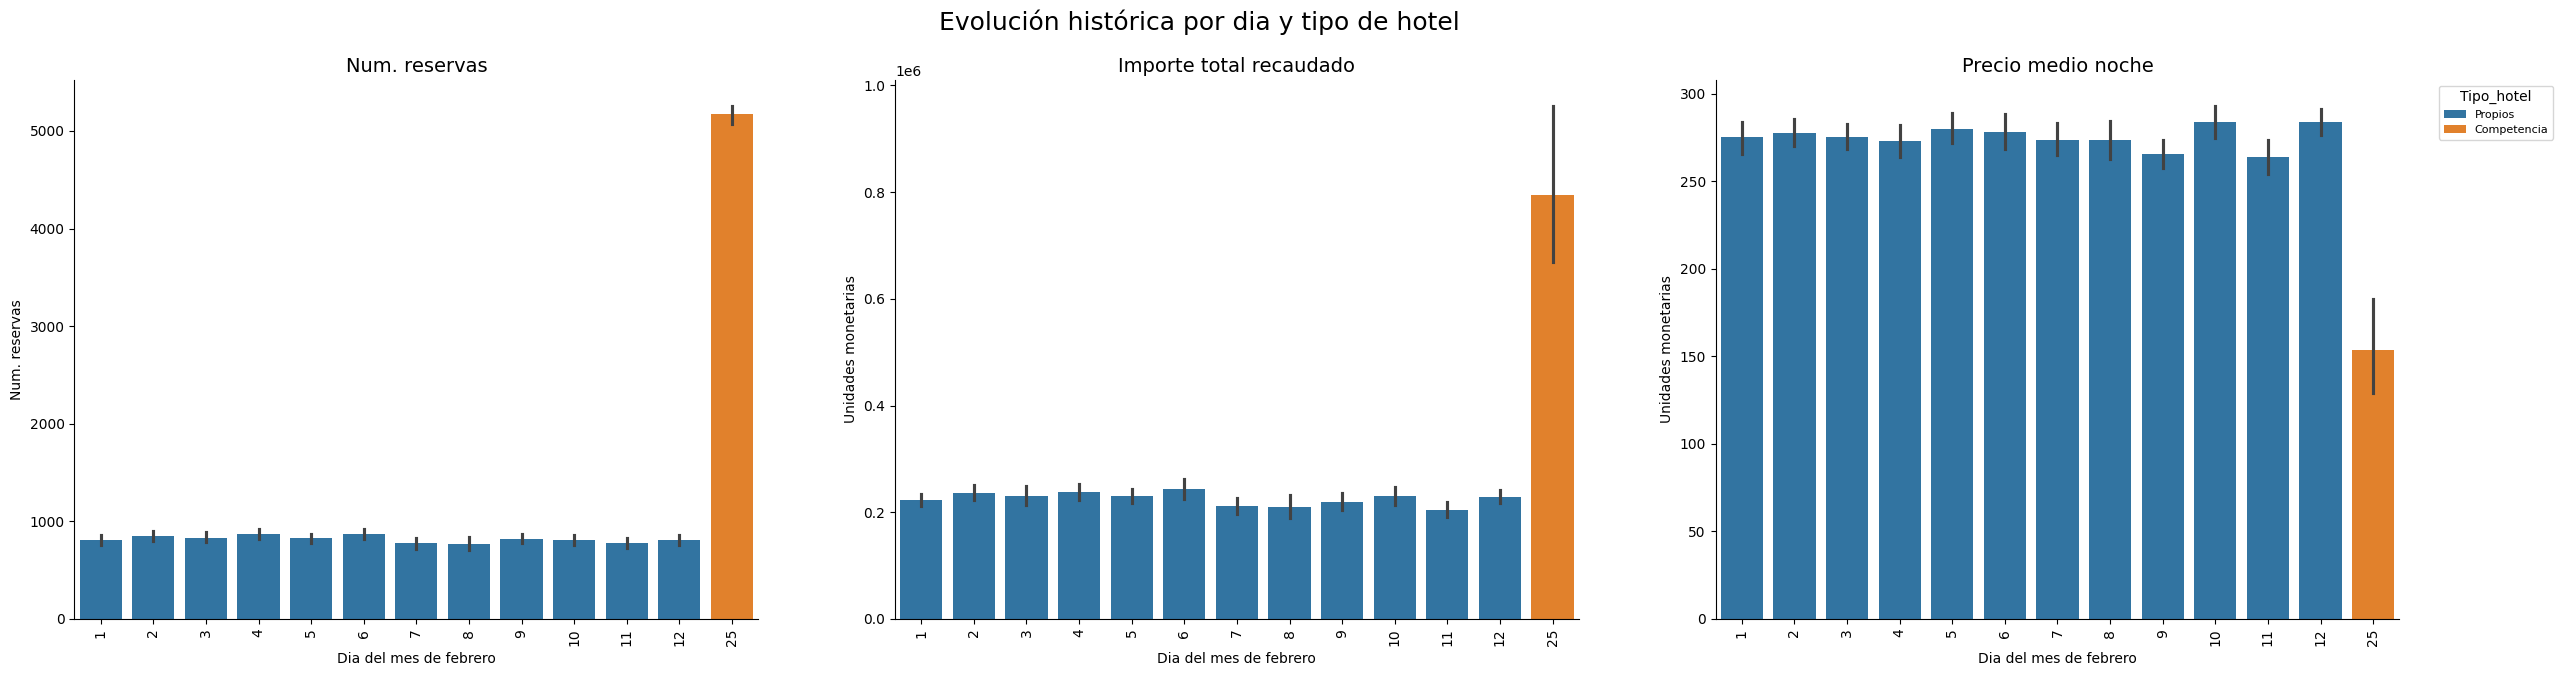

In [55]:
fig, axes = plt.subplots(1, 3, sharex= True, sharey=False, figsize= (30,7))
fig.suptitle('Evolución histórica por dia y tipo de hotel', fontsize=18)

#CREO EL PRIMER GRAFICO
sns.barplot(x='Dia_reserva', y='Num_reservas', data=df_fecha_reserva, hue='Tipo_hotel', estimator='sum', ci=95, linestyle = "dashed", errorbar = None, ax=axes[0])
axes[0].set_title('Num. reservas', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[0].set_xlabel("Dia del mes de febrero")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[0].set_ylabel("Num. reservas")

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
axes[0].legend().remove()

#CREO EL SEGUNDO GRAFICO
sns.barplot(x='Dia_reserva', y='Total_recaudado', data=df_fecha_reserva, hue='Tipo_hotel', estimator='sum', ci=95, linestyle = "dashed", errorbar = None, ax=axes[1])
axes[1].set_title('Importe total recaudado', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[1].set_xlabel("Dia del mes de febrero")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[1].set_ylabel("Unidades monetarias")

axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].tick_params(axis='x', rotation=90, labelsize=10)
axes[1].legend().remove()

#CREO EL TERCER GRAFICO
sns.barplot(x='Dia_reserva', y='Precio_medio_noche', data=df_fecha_reserva, hue='Tipo_hotel', estimator='mean', ci=95, linestyle = "dashed", errorbar = None ,ax=axes[2])
axes[2].set_title('Precio medio noche', fontsize = 14)

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
axes[2].set_xlabel("Dia del mes de febrero")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
axes[2].set_ylabel("Unidades monetarias")

axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].tick_params(axis='x', rotation=90, labelsize=10)
plt.legend(fontsize = 8, title = 'Tipo_hotel', title_fontsize =10,bbox_to_anchor=(1.05,1), loc = "upper left");

## CONCLUSIONES
- Todas las reservas se han realizado en febrero
- Las reservas de los hoteles propios se han realizado en diferentes dias, pero las reservas de los hoteles de la competencia se han realizado todas el día 25.
- El importe total recaudado por dia, en los hoteles propios, es similar.
- El precio medio por noche en los hoteles de la competencia es similar en todos los días, entorno a 270 unidades monetarias, sin embargo, en los hoteles de la competencia, la media del precio es de 150 unidades monetarias.